In [6]:
import sys
import os

# Add the parent directory to the sys.path to avoid 'ModuleNotFoundError'
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import rankdata
from scikit_posthocs import posthoc_nemenyi_friedman

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"] = ['serif']

from src.helpers import load_json, load_pickle
from src.metrics import calculate_metrics
from src.paths import paths
from src.config import MODEL_NAMES, TARGET

In [11]:
# Calculate metrics for each model each fold
y_val_list   = [pd.read_csv(path) for path in paths.get('y_val_paths')]
y_val_list   = [y_val[TARGET].to_numpy() for y_val in y_val_list]

metrics_dict = {}
for model_name in MODEL_NAMES:
    metrics_dict[model_name] = []
    y_pred_allfolds = load_json(paths[model_name]['pred'])
    y_pred_proba_allfolds = load_json(paths[model_name]['pred_proba'])

    for fold_idx in range(5):
        y_true = y_val_list[fold_idx]
        y_pred = np.array(y_pred_allfolds[fold_idx])
        y_pred_proba = np.array(y_pred_proba_allfolds[fold_idx])

        metrics_fold = calculate_metrics(y_true, y_pred, y_pred_proba)
        metrics_dict[model_name].append(metrics_fold)
metrics_dict

(55,) (55,) (55,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(54,) (54,) (54,)
(54,) (54,) (54,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(54,) (54,) (54,)
(54,) (54,) (54,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(54,) (54,) (54,)
(54,) (54,) (54,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(54,) (54,) (54,)
(54,) (54,) (54,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(54,) (54,) (54,)
(54,) (54,) (54,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(55,) (55,) (55,)
(54,) (54,) (54,)
(54,) (54,) (54,)


{'catboost': [{'accuracy': 0.8545454545454545,
   'roc_auc': 0.8986666666666666,
   'f1_score': 0.8333333333333334,
   'mse': 0.13329075587747896,
   'precision': 0.8695652173913043,
   'recall': 0.8,
   'specificity': 0.9},
  {'accuracy': 0.8909090909090909,
   'roc_auc': 0.9520000000000001,
   'f1_score': 0.8846153846153846,
   'mse': 0.08121650450278582,
   'precision': 0.8518518518518519,
   'recall': 0.92,
   'specificity': 0.8666666666666667},
  {'accuracy': 0.9090909090909091,
   'roc_auc': 0.9466666666666665,
   'f1_score': 0.8979591836734694,
   'mse': 0.10535966038393173,
   'precision': 0.9166666666666666,
   'recall': 0.88,
   'specificity': 0.9333333333333333},
  {'accuracy': 0.8703703703703703,
   'roc_auc': 0.9241379310344827,
   'f1_score': 0.8679245283018868,
   'mse': 0.10163747251818069,
   'precision': 0.8214285714285714,
   'recall': 0.92,
   'specificity': 0.8275862068965517},
  {'accuracy': 0.8703703703703703,
   'roc_auc': 0.9475862068965518,
   'f1_score': 0.85

## 1. Check if metrics have normal distribution

In [13]:
metrics_to_analyze = [
    'accuracy',
    'roc_auc',
    'f1_score',
    'precision',
    'recall',
    'specificity'
]

In [14]:
def check_normality(metrics_dict, metrics_to_analyze):
    results = []

    for model, metrics_list in metrics_dict.items():
        for metric in metrics_to_analyze:
            values = [metrics[metric] for metrics in metrics_list]
            stat, p_value = stats.shapiro(values)
            result = {
                'model': model,
                'metric': metric,
                'statistic': stat,
                'p_value': p_value,
                'normality': 'normal' if p_value > 0.05 else 'not normal'
            }
            results.append(result)
    
    results_df = pd.DataFrame(results)
    return results_df

normality_results_df = check_normality(metrics_dict, metrics_to_analyze)
normality_results_df

,model,metric,statistic,p_value,normality
0,catboost,accuracy,0.946522,0.712336,normal
1,catboost,roc_auc,0.838784,0.161588,normal
2,catboost,f1_score,0.980866,0.939200,normal
3,catboost,precision,0.940116,0.666758,normal
4,catboost,recall,0.802990,0.085693,normal
5,catboost,specificity,0.910757,0.472151,normal
6,xgboost,accuracy,0.977634,0.921584,normal
7,xgboost,roc_auc,0.800256,0.081425,normal
8,xgboost,f1_score,0.963147,0.829707,normal
9,xgboost,precision,0.946566,0.712645,normal


## 2. Comparing Model Performance

In [15]:
def extract_metric_scores(metrics_dict, metric_name):
    metric_scores = {}
    for model_name in MODEL_NAMES:
        metric_scores[model_name] = [score[metric_name] for score in metrics_dict[model_name]]
    return metric_scores

def perform_friedman_test(metrics_dict, metric_name, verbose=0):
    # Prepare the data in the format required for the Friedman test
    metric_scores = extract_metric_scores(metrics_dict, metric_name)
    scores = [metric_scores[model_name] for model_name in metric_scores]
    
    # Perform the Friedman test
    stat, p_value = stats.friedmanchisquare(*scores)
    
    # Print the result
    print(f"Friedman test result for {metric_name}:")
    if verbose:
        print(f"Test Statistic: {stat}")
        print(f"P-Value: {p_value}")
    
    if p_value < 0.05:
        print(f"Significant differences")
    else:
        print(f"No significant differences")
    print('')


In [16]:
metrics_to_analyze = ['accuracy', 'roc_auc', 'f1_score', 'precision', 'recall', 'specificity']

for metric_name in metrics_to_analyze:
    perform_friedman_test(metrics_dict, metric_name, verbose=1)

Friedman test result for accuracy:
Test Statistic: 16.187499999999996
P-Value: 0.00632865051737763
Significant differences

Friedman test result for roc_auc:
Test Statistic: 16.65714285714286
P-Value: 0.005198098170259067
Significant differences

Friedman test result for f1_score:
Test Statistic: 13.343023255813954
P-Value: 0.02036779163580134
Significant differences

Friedman test result for precision:
Test Statistic: 15.377906976744185
P-Value: 0.008863946356156603
Significant differences

Friedman test result for recall:
Test Statistic: 4.999999999999996
P-Value: 0.41588018699550844
No significant differences

Friedman test result for specificity:
Test Statistic: 13.23170731707316
P-Value: 0.021301521953202084
Significant differences




Nemenyi post-hoc test results for accuracy:
Nemenyi post-hoc test found significant differences between lgbm and lr
Nemenyi post-hoc test found significant differences between lr and lgbm

Nemenyi post-hoc test results for roc_auc:
Nemenyi post-hoc test found significant differences between catboost and lr
Nemenyi post-hoc test found significant differences between lr and catboost

Nemenyi post-hoc test results for f1_score:
Nemenyi post-hoc test found significant differences between lgbm and lr
Nemenyi post-hoc test found significant differences between lr and lgbm

Nemenyi post-hoc test results for precision:
Nemenyi post-hoc test found significant differences between lgbm and svm
Nemenyi post-hoc test found significant differences between svm and lgbm

Nemenyi post-hoc test results for specificity:

Nemenyi post-hoc test results for recall:


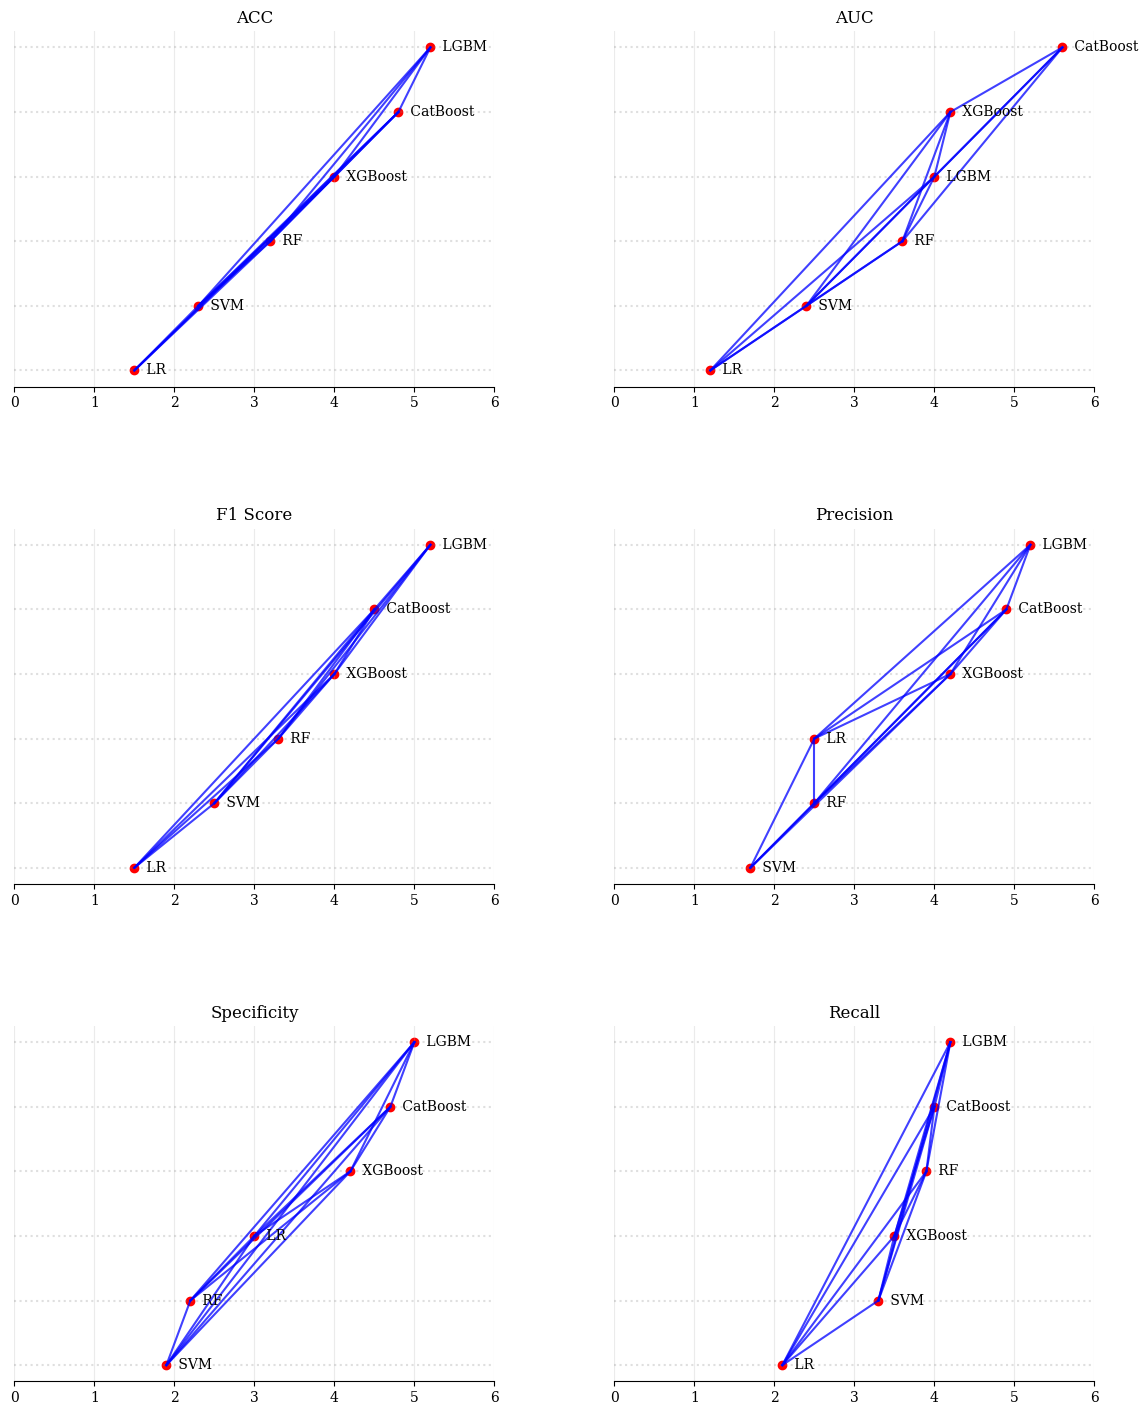

In [35]:
model_names_map = {
    'catboost': 'CatBoost',
    'xgboost': 'XGBoost',
    'lgbm': 'LGBM',
    'rf': 'RF',
    'svm': 'SVM',
    'lr': 'LR'
}
metric_names_map = {
    'accuracy': 'ACC',
    'roc_auc': 'AUC',
    'f1_score': 'F1 Score',
    'precision': 'Precision',
    'recall': 'Recall',
    'specificity': 'Specificity'
}

def identify_different_models(metrics_dict, metrics_to_analyze, verbose=0):
    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.flatten()
    
    for idx, metric_name in enumerate(metrics_to_analyze):
        metric_scores = extract_metric_scores(metrics_dict, metric_name)
        scores = np.array([metric_scores[model_name] for model_name in metric_scores])
                
        # Perform the Nemenyi post-hoc test
        nemenyi_results = posthoc_nemenyi_friedman(scores.T)
        
        print(f"\nNemenyi post-hoc test results for {metric_name}:")
        if verbose:
            print(nemenyi_results)
        
        significant_pairs = np.where(nemenyi_results <= 0.05)
        for i in range(len(significant_pairs[0])):
            model1 = list(metric_scores.keys())[significant_pairs[0][i]]
            model2 = list(metric_scores.keys())[significant_pairs[1][i]]
            print(f"Nemenyi post-hoc test found significant differences between {model1} and {model2}")
        
        # Visualization - Critical Difference (CD) Diagram
        plot_cd_diagram(metric_scores, nemenyi_results, metric_names_map[metric_name], axs[idx])

    # Adjust the space between the subplots and margin of the plot
    plt.subplots_adjust(wspace=0.25, hspace=0.4, left=0.05, right=0.95, top=0.95, bottom=0.05)
    
    plt.savefig('../img/critical_difference_plot.jpeg', format='jpeg', dpi=600)
    plt.show()

def plot_cd_diagram(metric_scores, nemenyi_results, title, ax):
    model_names = list(metric_scores.keys())
    
    # Calculate ranks
    ranks = np.array([rankdata(score) for score in zip(*metric_scores.values())])
    mean_ranks = np.mean(ranks, axis=0)
    
    # Sort models by mean rank
    sorted_indices = np.argsort(mean_ranks)
    sorted_mean_ranks = mean_ranks[sorted_indices]
    sorted_model_names = [model_names[i] for i in sorted_indices]
    
    # Plotting
    ax.set_title(title)
    
    # Draw horizontal lines for each model
    for i, (rank, name) in enumerate(zip(sorted_mean_ranks, sorted_model_names)):
        ax.hlines(y=i, xmin=0, xmax=6, color='grey', linestyles='dotted', alpha=0.25)
        ax.scatter(rank, i, color='red')
        ax.text(rank+0.1, i, f' {model_names_map[name]}', va='center', ha='left', fontsize=10)

    # Adjust index for sorted ranks
    for i, (rank, name) in enumerate(zip(sorted_mean_ranks, sorted_model_names)):
        # Map back to original indices
        original_index_i = model_names.index(name)
        for j in range(i + 1, len(sorted_mean_ranks)):
            original_index_j = model_names.index(sorted_model_names[j])
            if nemenyi_results.iloc[original_index_i, original_index_j] > 0.05:  # Non-significant difference
                ax.plot([sorted_mean_ranks[i], sorted_mean_ranks[j]], [i, j], 'b-', alpha=0.75)
    
    ax.set_yticks([])
    ax.spines[['right', 'top', 'left']].set_visible(False)
    ax.set_xlim(0,6)
    ax.grid(True, alpha=0.25)

metrics_to_analyze = ['accuracy', 'roc_auc', 'f1_score', 'precision', 'specificity', 'recall']
identify_different_models(metrics_dict, metrics_to_analyze, verbose=0)


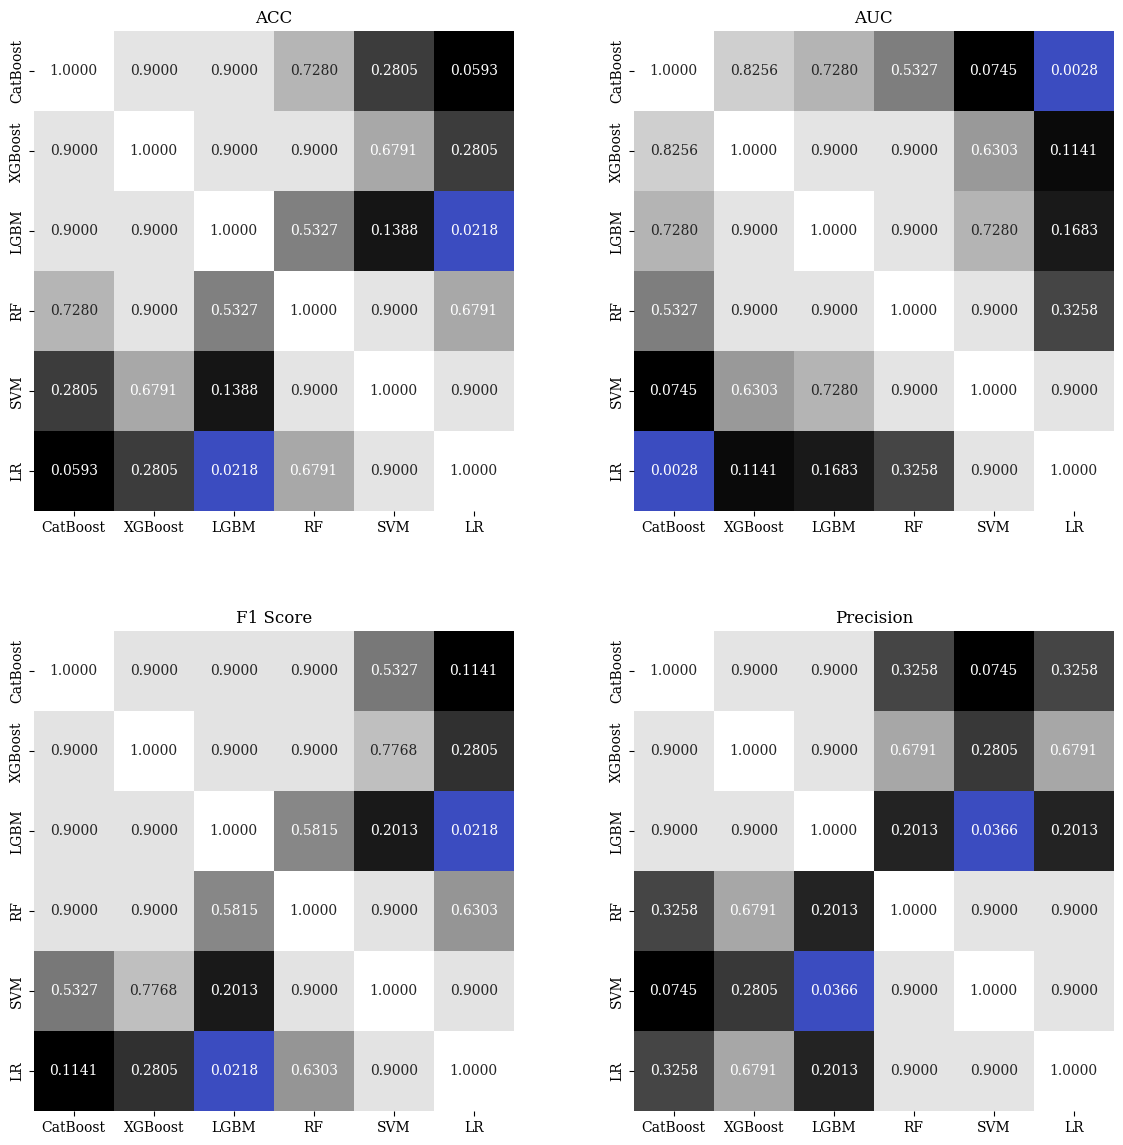

In [40]:
def identify_different_models(metrics_dict, metrics_to_analyze, verbose=0):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs = axs.flatten()
    
    for idx, metric_name in enumerate(metrics_to_analyze):
        metric_scores = extract_metric_scores(metrics_dict, metric_name)
        scores = np.array([metric_scores[model_name] for model_name in metric_scores])
                
        # Perform the Nemenyi post-hoc test
        nemenyi_results = posthoc_nemenyi_friedman(scores.T)
        
        if verbose:
            print(f"\nNemenyi post-hoc test results for {metric_name}:")
            print(nemenyi_results)
        
        # Visualization - Pairwise Comparison Matrix Heatmap
        plot_pairwise_comparison_matrix(nemenyi_results, metric_names_map[metric_name], axs[idx])
    
    # Adjust the space between the subplots and margin of the plot
    plt.subplots_adjust(wspace=0.25, hspace=0.25, left=0.05, right=0.95, top=0.95, bottom=0.05)

    plt.savefig('../img/pairwise_comparison_matrices.jpeg', format='jpeg', dpi=600)
    plt.show()

def plot_pairwise_comparison_matrix(nemenyi_results, title, ax):
    # Masking non-significant values (values > 0.05)
    mask = nemenyi_results > 0.05
    
    # Plot heatmap
    sns.heatmap(nemenyi_results, annot=True, fmt=".4f", cmap="coolwarm", cbar=False, 
                xticklabels=nemenyi_results.columns, yticklabels=nemenyi_results.index, 
                mask=mask, ax=ax)
    
    # Overlaying significant values with a different color map
    sns.heatmap(nemenyi_results, annot=True, fmt=".4f", cmap="grey", cbar=False, 
                xticklabels=nemenyi_results.columns, yticklabels=nemenyi_results.index, 
                mask=~mask, ax=ax)
    
    ax.set_title(title)
    labels = [model_names_map[model_name] for model_name in MODEL_NAMES]
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

metrics_to_analyze = ['accuracy', 'roc_auc', 'f1_score', 'precision']
identify_different_models(metrics_dict, metrics_to_analyze, verbose=0)
